In [57]:
import sklearn as sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics as sm

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report
from mpl_toolkits.mplot3d import Axes3D

In [59]:
# Read in breast cancer recurrence data
breast = pd.read_csv('/Users/kayleighlawson-michod/Desktop/breast-cancer.data')
breast['id'] = np.arange(len(breast))

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1,id
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,1
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,2
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,3
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no,4
...,...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,280
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,281
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,282
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no,283


In [73]:
# Cross tab to set up data for k means clustering
recurrence = pd.crosstab(breast['id'], breast['no-recurrence-events']).reset_index().rename_axis(None, axis=1)
age = pd.crosstab(breast['id'], breast['30-39']).reset_index().rename_axis(None, axis=1)
meno = pd.crosstab(breast['id'], breast['premeno']).reset_index().rename_axis(None, axis=1)
two = pd.crosstab(breast['id'], breast['0-2']).reset_index().rename_axis(None, axis=1)
no = pd.crosstab(breast['id'], breast['no']).reset_index().rename_axis(None, axis=1)
three = pd.crosstab(breast['id'], breast['3']).reset_index().rename_axis(None, axis=1)
left = pd.crosstab(breast['id'], breast['left']).reset_index().rename_axis(None, axis=1)
left_low = pd.crosstab(breast['id'], breast['left_low']).reset_index().rename_axis(None, axis=1)
no1 = pd.crosstab(breast['id'], breast['no.1']).reset_index().rename_axis(None, axis=1)

In [93]:
# Join cross tabs
join = recurrence.set_index('id').join(age.set_index('id'))
join1 = join.join(meno.set_index('id'))
join2 = join1.join(two.set_index('id'))
join3 = join2.join(no.set_index('id'))
join4 = join3.join(three.set_index('id'))
data = join4.join(left.set_index('id'))
data

In [100]:
#Scale data
X = scale(data)

,no-recurrence-events,recurrence-events,20-29,30-39,40-49,50-59,60-69,70-79,ge40,lt40,...,6-8,9-11,?,no,yes,1,2,3,left,right
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [124]:
# Calculate the sum of least square error for each different values of 'k'. 

k = range(1,10)
sum_squared_errors = []

for i in k:
  model = KMeans(n_clusters = i)
  model.fit_predict(X)
  sum_squared_errors.append(model.inertia_)

sum_squared_errors

[713.6998289434159,
 283.4610178020931,
 72.47601670996698,
 62.84061768542222,
 53.8696909424432,
 46.31133246997692,
 40.26302732417387,
 35.21388799401133,
 30.806520868530427]

In [ ]:
#Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) .

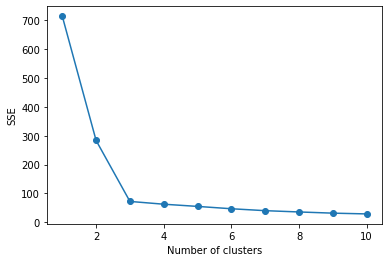

In [125]:
sum_squared_errors = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    sum_squared_errors.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Basically what is happening is the k-means alogirthm is randomly picking a k centroids and assigning each sample to the nearest centroid and then calculates the sum of squared errors (SSE) for each cluster
# This repeats until the model converges and the model which minimizes the SSE is considered the optimal model
# The SSE for each k is sometimes refered to as inertia_ and can be accesses from the Kmeans model fit by model.inertia_
# Selecting the optimal number for k in real world data sets is more complicated then selecting the value that minimizes SSE
# SSE will continue to decrease with increasing values for k, but that does not mean that k is informative
# The elbow method is used to identify the point at which SSE is declining most rapidly, below we can see that value is ~3

In [130]:
# Finally plot the optimal clusters with their centroids along with a brief explanation (50 points).
# k = 3 appears to be the optimal solution by the elbow method
# KMeans
km = KMeans(
    n_clusters=3, init='random', #define number of centroids to use for the clustering
    n_init=10, max_iter=300, #run k-means clustering algorithm 10 times with random centroids to determine which model minizes the SSE
    tol=1e-04, random_state=0 #
)

y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

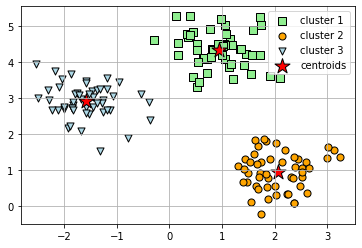

In [131]:
# in ploting the clusters for k = 3 and the centroids 
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Overall it looks like the clusters form relatively well around the centroids with a small outlier cluster in cluster 2 and more general variation in cluster 1 and 3